## Скачиваем библиотеке


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Настройки отображения

In [3]:
pd.set_option('display.max_columns', None)
sns.set(style = "whitegrid", palette = "muted")

## Загрузка данных

In [5]:
df = pd.read_csv("data/kc_house_data.csv")
print("Размер датасета: ", df.shape)
df.head()

Размер датасета:  (21613, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## Предварительная очистка данных

In [6]:
print(df.isna().sum())

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


##  Удаляем строки с пропущенными ключевыми данными

In [ ]:
df = df.dropna(subset = ["price", "bedrooms", "sqft_living", "sqft_lot", "floors", "waterfront", "view", "condition", "grade", "sqft_above", "sqft_basement", "yr_built", "yr_renovated", "zipcode", "lat", "long", "sqft_living15", "sqft_lot15"])

## Преобразуем типы данных

In [39]:
df["price"] = df["price"].astype(int)
df["bedrooms"] = df["bedrooms"].astype(float)
df["sqft_living"] = df["sqft_living"].astype(int)
df["floors"] = df["floors"].astype(int)
df["waterfront"] = df["waterfront"].astype(float)
df["view"] = df["view"].astype(float)
df["grade"] = df["grade"].astype(float)
df["sqft_above"] = df["sqft_above"].astype(int)
df["sqft_lot"] = df["sqft_lot"].astype(int)
df["yr_built"] = df["yr_built"].astype(int)
df["yr_renovatedt"] = df["yr_renovated"].astype(int)
df["zipcode"] = df["zipcode"].astype(int)
df["lat"] = df["lat"].astype(int)
df["long"] = df["long"].astype(int)
df["sqft_living15"] = df["sqft_living15"].astype(int)
df["sqft_lot15"] = df["sqft_lot15"].astype(int)

## Создаём признак возраста дома

In [40]:
df["building_age"] = 2025 - df["yr_built"]

## Перевод в метры

In [41]:
df["area_m2"] = df["sqft_living"] * 0.0929

## Базовые статистики

In [42]:
print("\nОсновная статистика: ")
print(df[["price", "area_m2", "building_age"]].describe())


Основная статистика: 
              price       area_m2  building_age
count  2.161300e+04  21613.000000  21613.000000
mean   5.400881e+05    193.222685     53.994864
std    3.671272e+05     85.323159     29.373411
min    7.500000e+04     26.941000     10.000000
25%    3.219500e+05    132.568300     28.000000
50%    4.500000e+05    177.439000     50.000000
75%    6.450000e+05    236.895000     74.000000
max    7.700000e+06   1257.866000    125.000000


## Средняя цена по районам

In [30]:
avg_price_by_district = df.groupby("zipcode")["price"].mean().sort_values(ascending=False)
print("\nСреднее по районам: ")
print(avg_price_by_district.head())


Среднее по районам: 
zipcode
98039    2.160607e+06
98004    1.355927e+06
98040    1.194230e+06
98112    1.095499e+06
98102    9.012583e+05
Name: price, dtype: float64


## Визуализации

<function matplotlib.pyplot.show(close=None, block=None)>

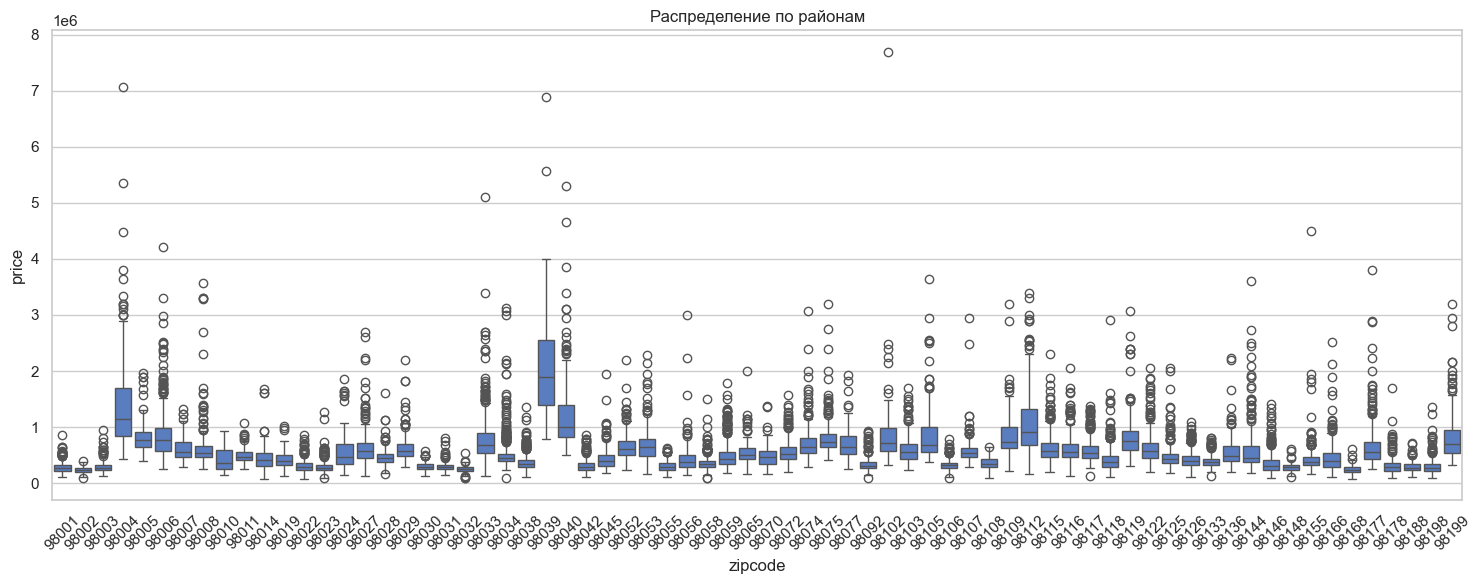

In [ ]:
# по районам
plt.figure(figsize=(15, 6))
sns.boxplot(data=df, x = "zipcode", y = "price")
plt.xticks(rotation = 45)
plt.title("Распределение по районам")
plt.tight_layout()
plt.show

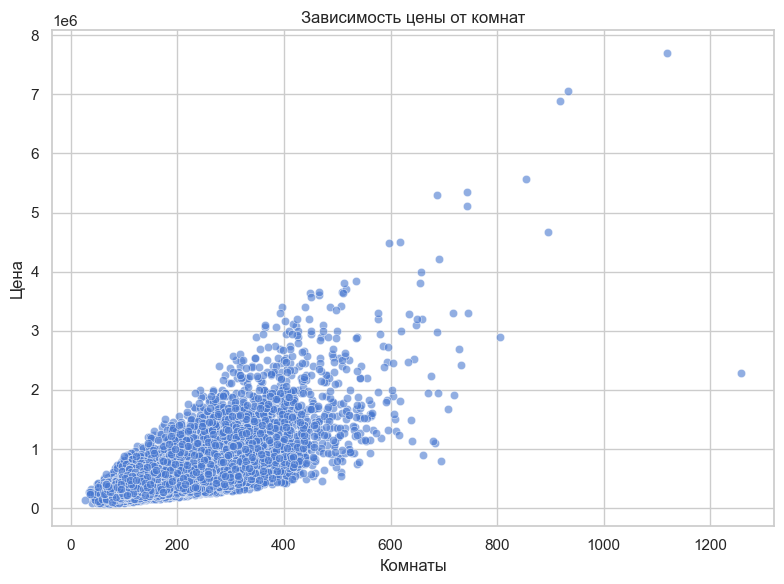

In [ ]:
# площадь и цена
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x = "area_m2", y = "price", alpha=0.6)
plt.title("Зависимость цены от комнат")
plt.xlabel("Комнаты")
plt.ylabel("Цена")
plt.tight_layout()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

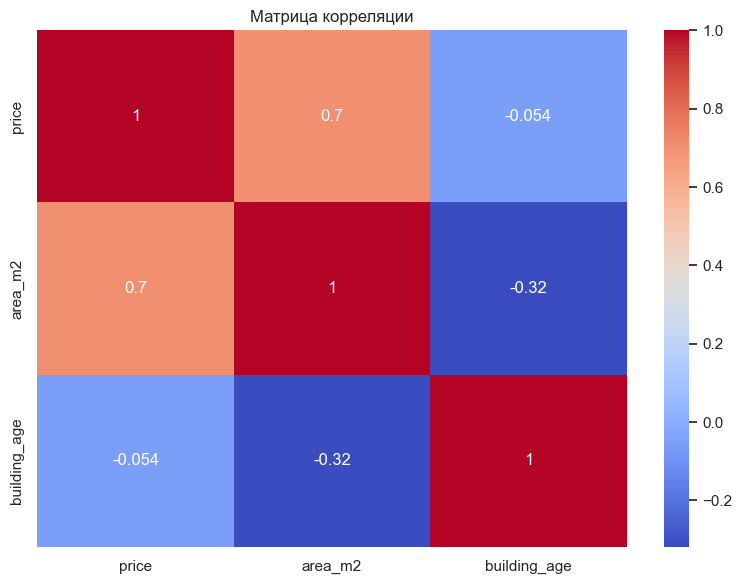

In [ ]:
# корреляция
plt.figure(figsize=(8, 6))
sns.heatmap(df[["price", "area_m2", "building_age"]].corr(), annot=True, cmap="coolwarm")
plt.title("Матрица корреляции")
plt.tight_layout()
plt.show

In [38]:
print("""
Вывод:
1. Средняя цена жилья сильно различается по районам — в престижных локациях значительно выше.
2. Цена напрямую зависит от площади (коэффициент корреляции положительный).
3. Возраст дома оказывает слабое отрицательное влияние на цену — чем старше, тем дешевле.
""")


Вывод:
1. Средняя цена жилья сильно различается по районам — в престижных локациях значительно выше.
2. Цена напрямую зависит от площади (коэффициент корреляции положительный).
3. Возраст дома оказывает слабое отрицательное влияние на цену — чем старше, тем дешевле.

